In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from functions import *

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
# load data, 
# not using a cleaning function
# dropping ingredients used in less than 0.00013 recipies

X, y, features = get_design_matrix(min_df = 0.00013)

print("There are %d recipies and %d feautres" % (X.shape[0], len(features)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



There are 39774 recipies and 1781 feautres


In [ ]:
print("Testing the forrests")
print("")
forrest_scores = forrest_tester(x_train, y_train, [50, 100, 150, 200], [5,10,15,None], folds = 2, plot = True)
print("")
print("")

print("Testing SVMs")
print("")
svm_scores = svm_tester(x_train, y_train, [0.001, 0.01, 0.1, 1], folds = 2, plot = True)
print("")
print("")

print("Testing logistic regression")
print("")
logistic_scores = logistic_tester(x_train, y_train, [0.001, 0.01, 0.1, 1], folds = 2, plot = True)
print("")
print("")



Testing the forrests



## Cross validation for MLP. 
This takes ages to run!

In [ ]:
#print("Testing MLP")
#print("")
#mlp_scores = mlp_tester(x_train, y_train, [500, 800, 1000], [0.0001, 0.001, 0.01], folds = 2, plot = True)
#print("")
#print("")

## Picking best min_df

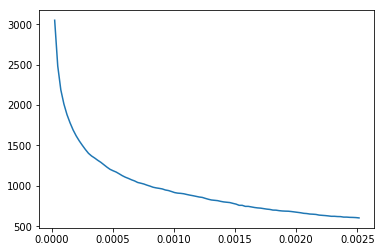

In [38]:
# First we make a list of dfs. 
# The are 39774 in total, so min_df = i/39774 means 
# include every ingredient that appears in at least i recipies.
df_list = [i/39774 for i in range(1,101)] 
feat_num = []

data = pd.read_json('train.json') 
recipie_list_list = data.ingredients.values.tolist()
recipie_string_list = [" ".join(ing) for ing in recipie_list_list]
del data, recipie_list_list

for df in df_list :
    vectorizer = CountVectorizer(min_df = df)
    X = vectorizer.fit_transform(recipie_string_list)
    feat_num.append(len(vectorizer.get_feature_names()))

    
plt.plot(range(1,101), feat_num, "-")
plt.xlabel('recipies')
plt.ylabel('features/ingredients')
plt.show()


In [5]:
svm_list, log_list, forrest_list = accuracy_with_min_df(min_df_list = [0.3, 0.2, 0.1, 0.01], svm_parms = [0.1, 1], log_parms = [0.1, 1], forrest_trees = [10, 20], forrest_depth = [None], folds = 2)

Testing min_df = 0.300000
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.200000
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.100000
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation

Testing min_df = 0.010000
Now doing svm cross validation
Now doing logistic cross validation
Now doing forrest cross validation



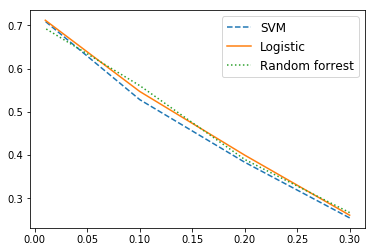

In [11]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot([0.3, 0.2, 0.1, 0.01], svm_list, '--', label='SVM')
ax.plot([0.3, 0.2, 0.1, 0.01], log_list, '-', label='Logistic')
ax.plot([0.3, 0.2, 0.1, 0.01], forrest_list, ':', label='Random forrest')

legend = ax.legend(loc='best', fontsize='large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

plt.show()